## Feature Engineering And Selection

### Task 1: Feature Creation

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv(r"C:\Users\hp\Documents\Task 3\students_dropout.csv")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [8]:
df.shape

(4424, 37)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [10]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

### Developing new Features

In [12]:
# Assuming 'Curricular units 1st sem (grade)' and 'Curricular units 2nd sem (grade)' represent performance
# We can estimate study time by considering the grades in both semesters.

df['Study_Time_per_Credit'] = (df['Curricular units 1st sem (grade)'] + df['Curricular units 2nd sem (grade)']) / (
                                 df['Curricular units 1st sem (enrolled)'] + df['Curricular units 2nd sem (enrolled)'])
df['Study_Time_per_Credit'].head()

0         NaN
1    2.305556
2    0.000000
3    2.152381
4    2.111111
Name: Study_Time_per_Credit, dtype: float64

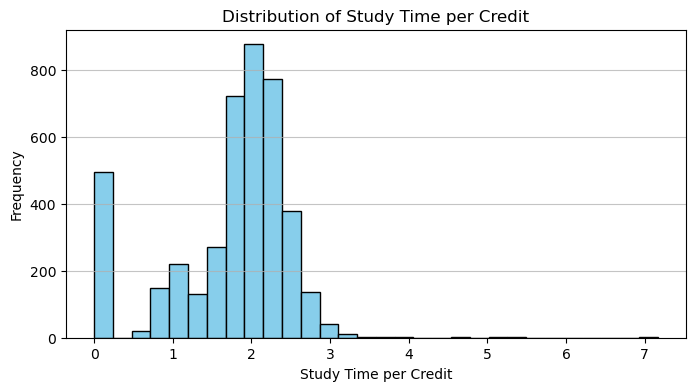

In [13]:
# Create a histogram
plt.figure(figsize=(8, 4))
plt.hist(df['Study_Time_per_Credit'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Study Time per Credit')
plt.xlabel('Study Time per Credit')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


### Interpretation of Study Time per Credit Histogram

The histogram illustrates the distribution of `Study Time per Credit` among students:

- The majority of students spend between 1 and 3 hours per credit, with a notable peak around 2 hours.
- A lower frequency is observed for students who study less than 1 hour or more than 3 hours per credit.
- This suggests that students who invest moderate study time may be less likely to drop out.
- Overall, there appears to be a potential relationship between study habits and retention rates.


In [15]:
# Calculate the difference in grades between semesters
df['Performance_Consistency'] = abs(df['Curricular units 1st sem (grade)'] - df['Curricular units 2nd sem (grade)'])
df['Performance_Consistency'].head()

0    0.000000
1    0.333333
2    0.000000
3    1.028571
4    0.666667
Name: Performance_Consistency, dtype: float64

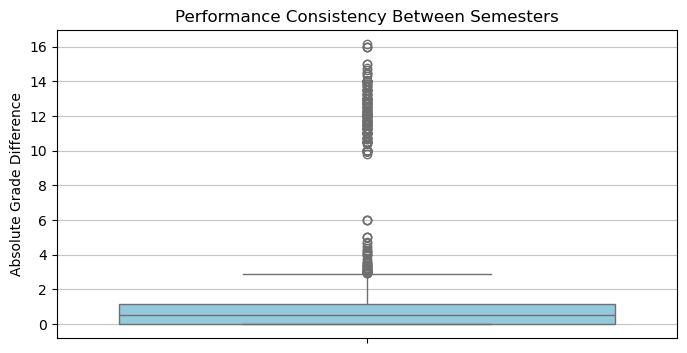

In [16]:
# Create a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(y=df['Performance_Consistency'], color='skyblue')
plt.title('Performance Consistency Between Semesters')
plt.ylabel('Absolute Grade Difference')
plt.grid(axis='y', alpha=0.75)
plt.show()


### Interpretation of Performance Consistency Box Plot

The box plot illustrates that most students exhibit minimal grade differences between semesters, suggesting stable academic performance. However, the presence of outliers indicates some students face significant fluctuations in their grades, which may correlate with higher dropout risks. Students with larger grade discrepancies could be struggling, highlighting the need for targeted support. Overall, maintaining consistent performance is crucial for reducing dropout rates.


In [18]:
# Calculate the Performance Ratio
df['Performance_ratio'] = (
    df['Curricular units 1st sem (approved)'] + df['Curricular units 2nd sem (approved)']
) / (
    df['Curricular units 1st sem (enrolled)'] + df['Curricular units 2nd sem (enrolled)']
)

# Display the first few rows of the Performance Ratio
df['Performance_ratio'].head()


0         NaN
1    1.000000
2    0.000000
3    0.916667
4    0.916667
Name: Performance_ratio, dtype: float64

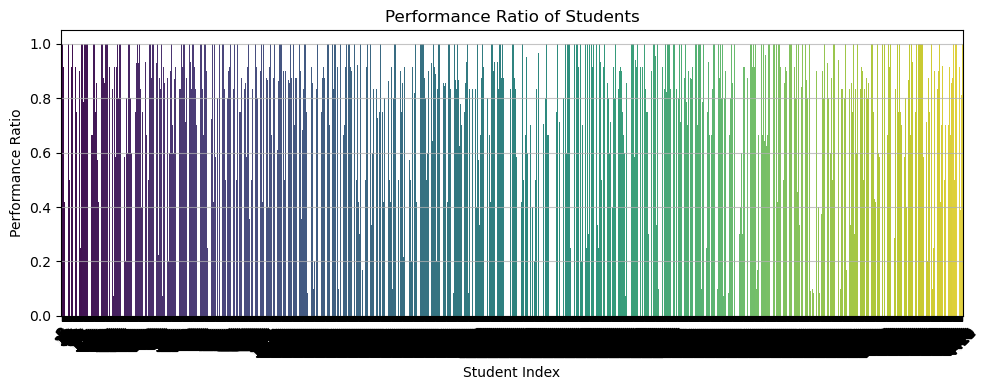

In [19]:
plt.figure(figsize=(10, 4))
sns.barplot(x=df.index, y=df['Performance_ratio'], palette='viridis')
plt.title('Performance Ratio of Students')
plt.xlabel('Student Index')
plt.ylabel('Performance Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()  # Optional: Adjust layout to prevent clipping of tick-labels
plt.show()



The **Performance Ratio** bar plot can be directly related to student dropout risks. Students with **lower performance ratios** (represented by shorter bars) may be more likely to drop out, as their academic progress appears weaker. In contrast, students with **higher performance ratios** (taller bars) are likely progressing well and may be at lower risk of dropping out. By visually identifying those with poor performance, this plot can help in predicting which students might require intervention to prevent dropout.

In [21]:
# Dropout Risk: You could create a "dropout risk score" based on variables like age, GPA, scholarship status, 
# or whether tuition fees are up to date. 
# A simple example might use Debtor and Tuition fees up to date to flag potential dropouts.

# Calculate the dropout risk with NaN handling
df['dropout_risk'] = np.where(
    df['Tuition fees up to date'].isna(), 
    0,  # Assign 0 if 'Tuition fees up to date' is NaN
    df['Debtor'] * (1 - df['Tuition fees up to date'])
)

# Display the first few rows of the dropout risk
df['dropout_risk'].head()


0    0
1    0
2    0
3    0
4    0
Name: dropout_risk, dtype: int64

In [22]:
# Study Engagement (sum of curricular units enrolled, credited, and evaluated across both semesters)
df['Study_Engagement'] = df[['Curricular units 1st sem (enrolled)', 
                                 'Curricular units 1st sem (credited)', 
                                 'Curricular units 1st sem (evaluations)', 
                                 'Curricular units 2nd sem (enrolled)', 
                                 'Curricular units 2nd sem (credited)', 
                                 'Curricular units 2nd sem (evaluations)']].sum(axis=1)
df['Study_Engagement'].head()

0     0
1    24
2    12
3    30
4    27
Name: Study_Engagement, dtype: int64

### Interaction terms between existing features

In [24]:
# Create the interaction term "Age at enrollment * Admission grade"
df['Age at enrollment * Admission grade'] = df['Age at enrollment'] * df['Admission grade']
df['Age at enrollment * Admission grade'].head()

0    2546.0
1    2707.5
2    2371.2
3    2392.0
4    6367.5
Name: Age at enrollment * Admission grade, dtype: float64

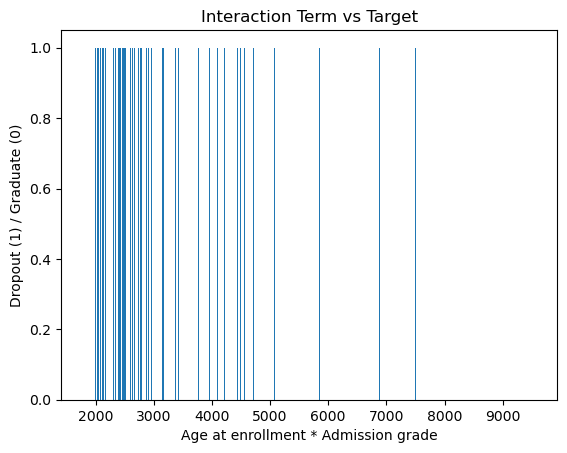

In [25]:
# Convert 'Target' into binary (0 for "Graduate", 1 for "Dropout")
df['Target_binary'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Scatter plot of the interaction term vs target
plt.bar(df['Age at enrollment * Admission grade'], df['Target_binary'])
plt.xlabel('Age at enrollment * Admission grade')
plt.ylabel('Dropout (1) / Graduate (0)')
plt.title('Interaction Term vs Target')
plt.show()


### Interaction Term vs Target

The chart illustrates the relationship between the interaction of "Age at enrollment * Admission grade" and student dropout rates. 

- Most data points indicate a low dropout rate (0), clustering around lower values of the interaction term.
- A few points at higher interaction values correspond to dropouts (1), suggesting that older students with higher admission grades may be more prone to dropping out.
- Overall, this implies that age and admission performance together influence dropout likelihood significantly.


### Polynomial Features

In [28]:
from sklearn.preprocessing import PolynomialFeatures

# Select the numerical columns you want to apply polynomial features to
numerical_columns = ['Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)',
                     'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 
                     'Previous qualification (grade)', 'Admission grade', 'GDP', 'Unemployment rate', 'Inflation rate']

# Extract the numerical data
numerical_data = df[numerical_columns]

# Create polynomial features with degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(numerical_data)

# Get the names of the new polynomial features
poly_feature_names = poly.get_feature_names_out(numerical_columns)

# Create a DataFrame with the polynomial features
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Add the polynomial features to the original dataset
data_with_poly = pd.concat([df, poly_df], axis=1)

# Display the first few rows of the dataset with polynomial features
data_with_poly.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Admission grade^2,Admission grade GDP,Admission grade Unemployment rate,Admission grade Inflation rate,GDP^2,GDP Unemployment rate,GDP Inflation rate,Unemployment rate^2,Unemployment rate Inflation rate,Inflation rate^2
0,1,17,5,171,1,1,122.0,1,19,12,...,16205.29,221.502,1374.84,178.22,3.0276,18.792,2.436,116.64,15.12,1.96
1,1,15,1,9254,1,1,160.0,1,1,3,...,20306.25,112.575,1980.75,-42.75,0.6241,10.981,-0.237,193.21,-4.17,0.09
2,1,1,5,9070,1,1,122.0,1,37,37,...,15575.04,217.152,1347.84,174.72,3.0276,18.792,2.436,116.64,15.12,1.96
3,1,17,2,9773,1,1,122.0,1,38,37,...,14304.16,-373.152,1124.24,-95.68,9.7344,-29.328,2.496,88.36,-7.52,0.64
4,2,39,1,8014,0,1,100.0,1,37,38,...,20022.25,111.785,1966.85,-42.45,0.6241,10.981,-0.237,193.21,-4.17,0.09


Polynomial features are crucial for capturing non-linear relationships in data, allowing linear models to fit complex patterns. They improve model performance by enabling better fits and revealing interactions between features. By adjusting the polynomial degree, you can control model complexity, enhancing predictive capabilities while avoiding overfitting. Overall, they serve as a powerful tool for feature engineering and improving the interpretability of models.


### Time-Based Features

In [31]:
# Since there are no date related columns on the dataset, i used a progress rate related feature.
# Ensure no division by zero by replacing zero-enrolled students with NaN or 1 (to avoid infinite rates)
df['Total_enrolled_units'] = df['Curricular units 1st sem (enrolled)'] + df['Curricular units 2nd sem (enrolled)']

# Progress Rate based on evaluations
df['Progress_rate_evaluations'] = (
    (df['Curricular units 1st sem (evaluations)'] + df['Curricular units 2nd sem (evaluations)']) / df['Total_enrolled_units']
).replace([float('inf'), -float('inf')], 0).fillna(0)

# Progress Rate based on approvals
df['Progress_rate_approvals'] = (
    (df['Curricular units 1st sem (approved)'] + df['Curricular units 2nd sem (approved)']) / df['Total_enrolled_units']
).replace([float('inf'), -float('inf')], 0).fillna(0)

# View the new columns
df[['Progress_rate_evaluations', 'Progress_rate_approvals']].head()


,Progress_rate_evaluations,Progress_rate_approvals
0,0.00,0.000000
1,1.00,1.000000
2,0.00,0.000000
3,1.50,0.916667
4,1.25,0.916667


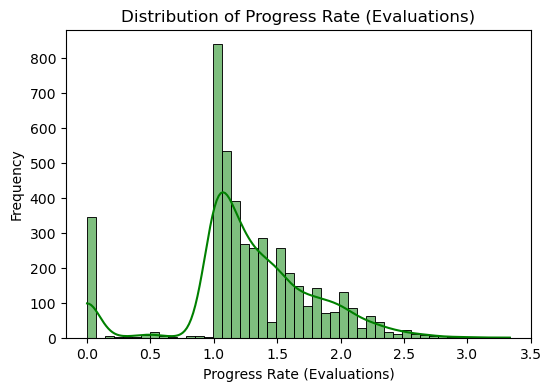

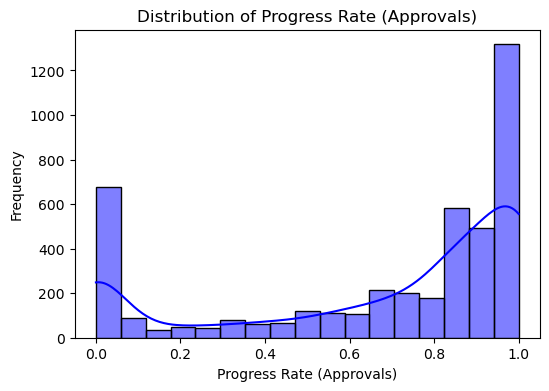

In [32]:
# Plot the distribution of Progress Rate for Evaluations
plt.figure(figsize=(6,4))
sns.histplot(df['Progress_rate_evaluations'], kde=True, color='green')
plt.title('Distribution of Progress Rate (Evaluations)')
plt.xlabel('Progress Rate (Evaluations)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Progress Rate for Approvals
plt.figure(figsize=(6,4))
sns.histplot(df['Progress_rate_approvals'], kde=True, color='blue')
plt.title('Distribution of Progress Rate (Approvals)')
plt.xlabel('Progress Rate (Approvals)')
plt.ylabel('Frequency')
plt.show()


### Relation of Progress Rate Distribution to Dropout Rates

The distribution of the Progress Rate (Evaluations) may have significant implications for student dropout rates. A high concentration of progress rates arounonero suggests that many students are making minimal progress, which could correlate with disengagement and an increased risk of dropping out. 

Additionally, the presence of extreme values—both positive and negative—indicates variability in student performance, highlighting the need for targeted interventions. Students with significantly low progress rates may be at a higher risk of dropping out, emphasizing the importance of monitoring evaluation outcomes to identify at-risk individuals and provide necessary support.


### Interpretation of Progress Rate Distribution and Its Relation to Dropout

The histogram illustrates the distribution of Progress Rate (Approvals), showing a right-skewed pattern with several peaks aroun0.8 and 1.0ve values. This indicates that many students are experiencing minimve progress, which could correlate with disengagement and a higher likelihood of dropping out. 

The presence of multiple peaks suggests variability in student experiences, emphasizing the need for early intervention strategies to support those at risk of falling behind. Monitoring these progress rates is crucial for identifying students who may need additional academic support to prevent dropout.


## Task 2: Feature Transformation

### log transformation to skewed numerical features

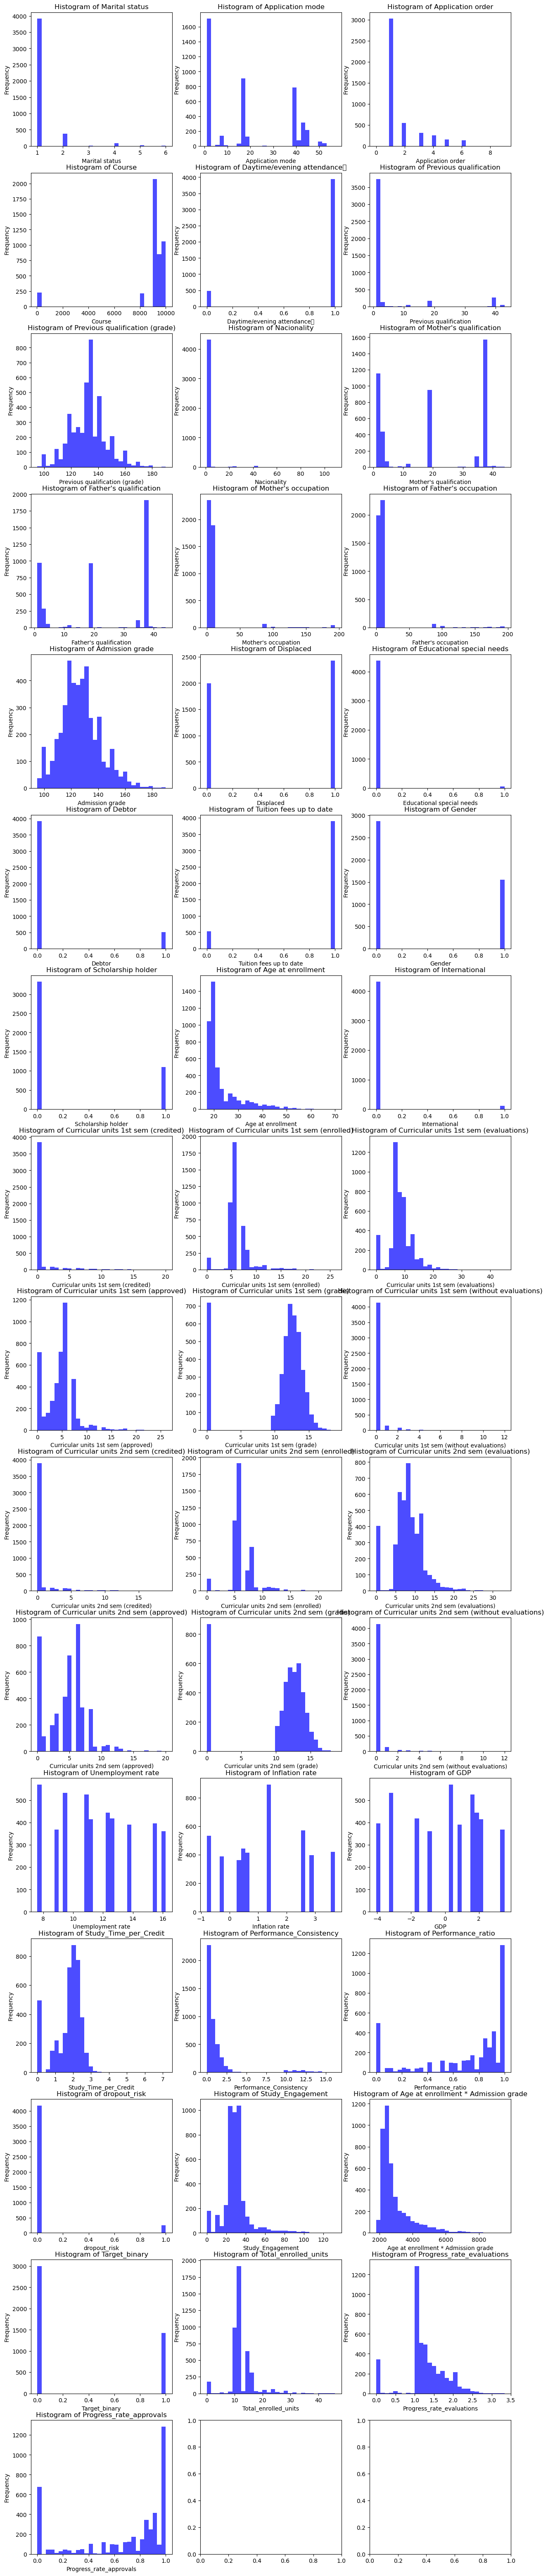

In [37]:
num_cols = df.select_dtypes(include='number').columns
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot histograms for each numerical column
for i, col in enumerate(num_cols):
    axes[i].hist(df[col], bins=30, alpha=0.7, color='blue')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')


In [38]:
# Identifying the skewed columns
skewed_cols = ['Admission grade', 
               'Performance_ratio', 
               'Previous qualification', 
               'Age at enrollment', 
               'Curricular units 1st sem (credited)',
               'Curricular units 1st sem (evaluations)',
               'Curricular units 1st sem (approved)', 
               'Study_Time_per_Credit', 
               'Performance_Consistency',
               'Curricular units 2nd sem (approved)', 

              ]

In [39]:
# Apply log transformation to skewed columns
for column in skewed_cols:
    # Check for non-negative values before applying log transformation
    if (df[column] < 0).any():
        print(f"Warning: Column '{column}' contains negative values. Log transformation cannot be applied.")
    else:
        # Applying log1p transformation
        df[column] = np.log1p(df[column])  # log1p(x) = log(1 + x)

# Optional: Check the first few rows of the transformed DataFrame
df[skewed_cols].head()

,Admission grade,Performance_ratio,Previous qualification,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Study_Time_per_Credit,Performance_Consistency,Curricular units 2nd sem (approved)
0,4.854371,NaN,0.693147,3.044522,0.0,0.000000,0.000000,NaN,0.000000,0.000000
1,4.966335,0.693147,0.693147,2.995732,0.0,1.945910,1.945910,1.195605,0.287682,1.945910
2,4.834693,0.000000,0.693147,2.995732,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,4.792479,0.650588,0.693147,3.044522,0.0,2.197225,1.945910,1.148158,0.707332,1.791759
4,4.959342,0.650588,0.693147,3.828641,0.0,2.302585,1.791759,1.134980,0.510826,1.945910


In [40]:
skewed_cols = ['Admission grade', 
               'Performance_ratio', 
               'Previous qualification', 
               'Age at enrollment', 
               'Curricular units 1st sem (credited)',
               'Curricular units 1st sem (evaluations)',
               'Curricular units 1st sem (approved)', 
               'Study_Time_per_Credit', 
               'Performance_Consistency',
               'Curricular units 2nd sem (approved)', 

              ]

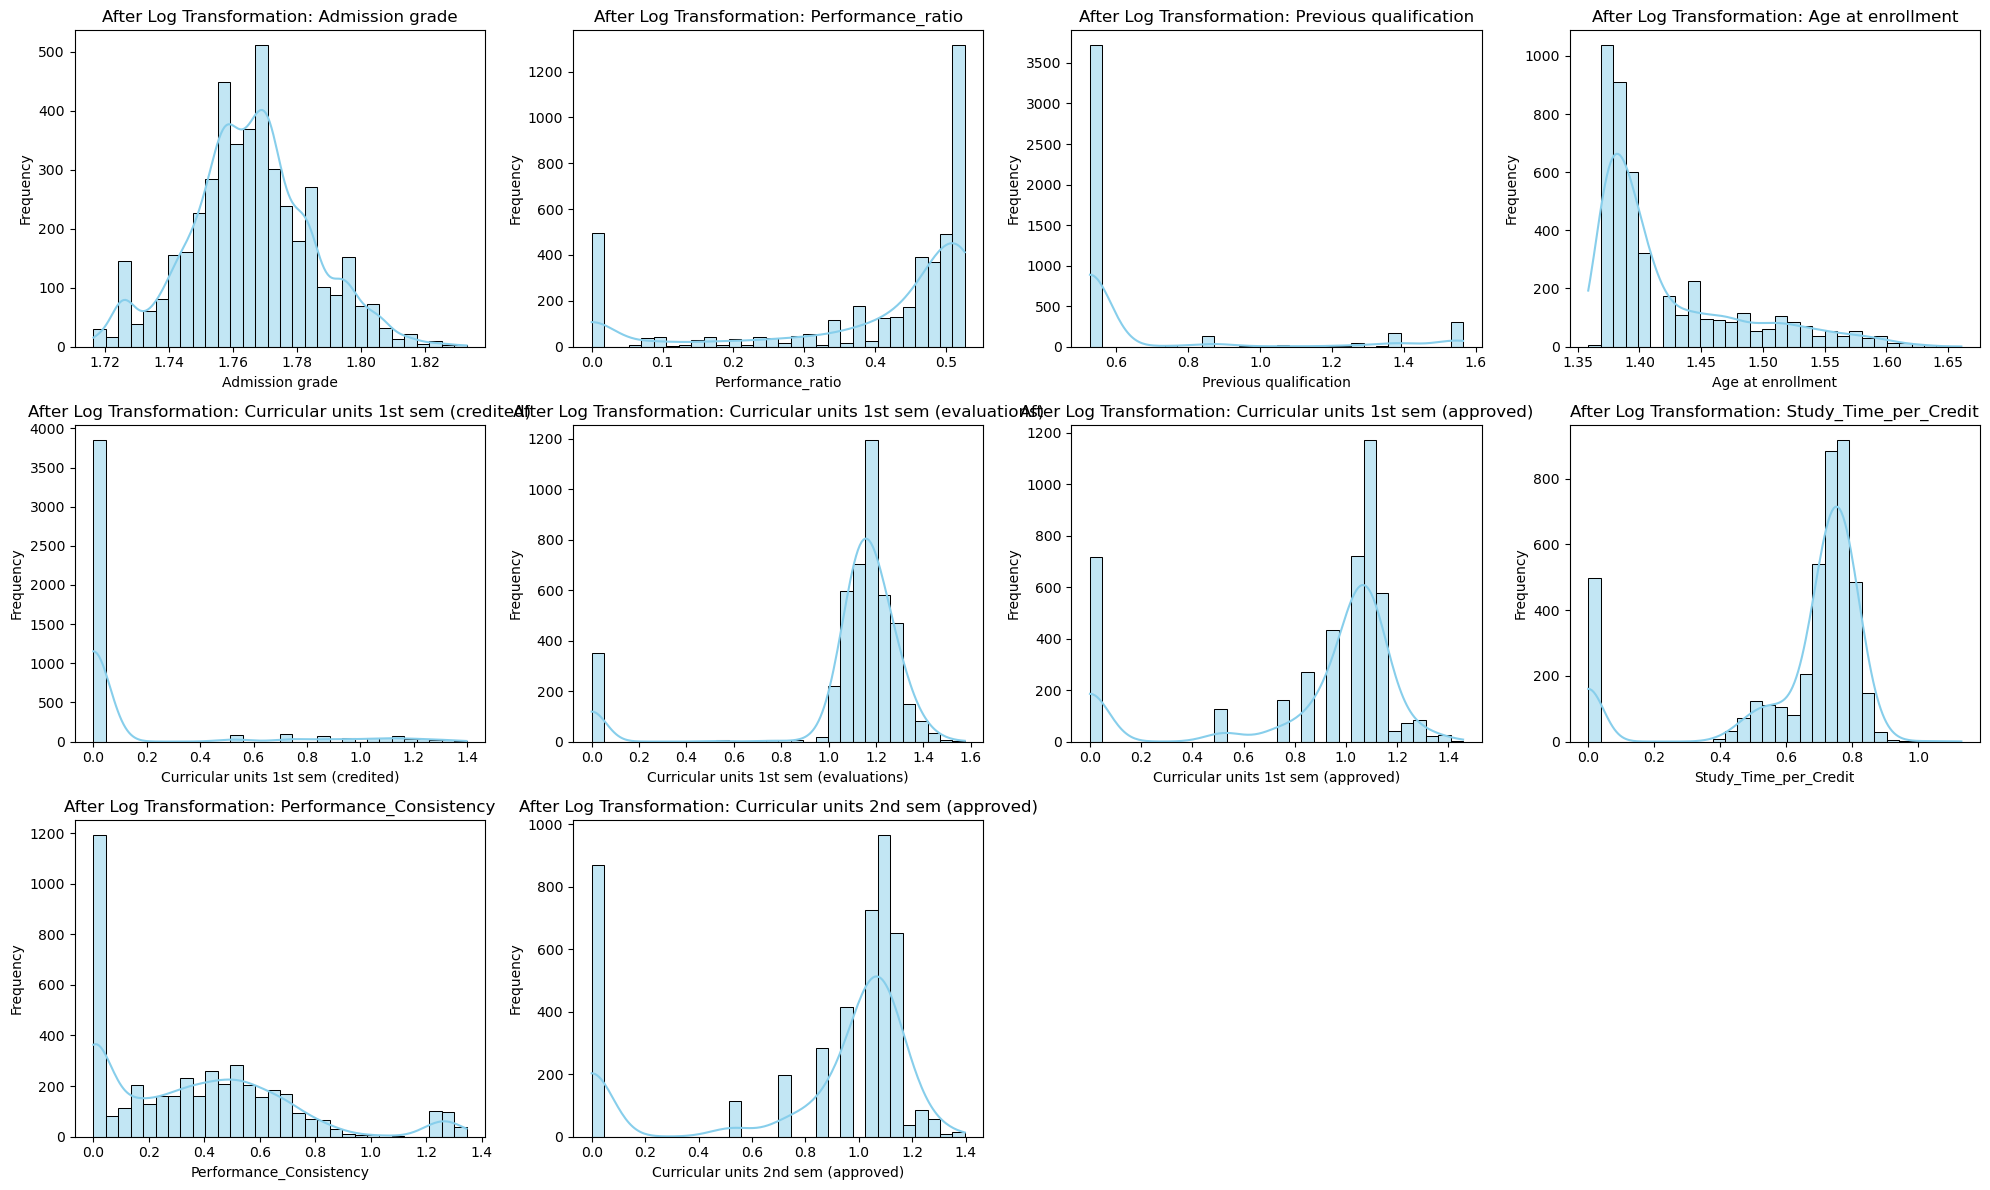

In [41]:
# Apply log transformation
for column in skewed_cols:
    if (df[column] < 0).any():
        print(f"Warning: Column '{column}' contains negative values. Log transformation cannot be applied.")
    else:
        df[column] = np.log1p(df[column])  # Apply log transformation

# Plotting histograms after log transformation
plt.figure(figsize=(20, 12))

for i, column in enumerate(skewed_cols, 1):
    plt.subplot(3, 4, i)  # Adjust the number of rows and columns as needed
    sns.histplot(df[column], kde=True, bins=30, color='skyblue')
    plt.title(f'After Log Transformation: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The chart displays the distribution of various variables after applying log transformation, which aims to normalize skewed data. Each subplot illustrates the frequency of different metrics such as admission grade, performance ratio, and curricular units across semesters. The log transformation appears to reduce skewness in most distributions, making them closer to a normal distribution. This adjustment can enhance the interpretability of the data and improve the performance of statistical analyses or machine learning models. Overall, the transformation helps in revealing underlying patterns that may be obscured in the original data.


### Bin continuous variables into categorical variables

In [44]:
# Binning Admission Grade into 'Low', 'Average', 'High', 'Excellent'
bins_admission = [1.716, 1.754,	1.766, 1.777, 1.833]  # Added an extra upper limit for the last bin
labels_admission = ['Low', 'Average', 'High', 'Excellent']
df['admission_grade_category'] = pd.cut(df['Admission grade'], bins=bins_admission, labels=labels_admission)

# Define bins using the provided statistics for Age at Enrollment
bins_age = [1.3589,	1.3852, 1.3973,	1.4488,	1.6606]
labels_age = ['Min-Q1', 'Q1-Q2', 'Q2-Q3', 'Q3-Max']
df['age_group'] = pd.cut(df['Age at enrollment'], bins=bins_age, labels=labels_age, include_lowest=True)

# Binning Unemployment Rate into 'Low', 'Moderate', 'High'
bins_unemployment = [0, 7.60, 11.10, 16.20]  
labels_unemployment = ['Low', 'Moderate', 'High']
df['unemployment_category'] = pd.cut(df['Unemployment rate'], bins=bins_unemployment, labels=labels_unemployment)

# Binning the marital status into broader categories with specific labels
df['marital_status_group'] = df['Marital status'].replace({
    0: 'Single',
    1: 'Married',
    2: 'Divorced',  # Keeping individual labels for Divorced, Widowed, and Separated
    3: 'Widowed',
    4: 'Separated'
})

# Print the first few rows to check the changes
df[['Admission grade', 'admission_grade_category', 'Age at enrollment', 'age_group', 'Unemployment rate', 
          'unemployment_category', 'Marital status', 'marital_status_group']].head()

,Admission grade,admission_grade_category,Age at enrollment,age_group,Unemployment rate,unemployment_category,Marital status,marital_status_group
0,1.767189,High,1.397363,Q2-Q3,10.8,Moderate,1,Married
1,1.786133,Excellent,1.385227,Q1-Q2,13.9,High,1,Married
2,1.763822,Average,1.385227,Q1-Q2,10.8,Moderate,1,Married
3,1.756560,Average,1.397363,Q2-Q3,9.4,Moderate,1,Married
4,1.784960,Excellent,1.574565,Q3-Max,13.9,High,2,Divorced


Binning is a technique used in data preprocessing to group continuous data into discrete intervals or "bins." This process helps simplify the data, making it easier to analyze and visualize by reducing noise and highlighting trends. Binning can also improve the performance of machine learning algorithms by transforming numerical features into categorical ones, enhancing model interpretability. Additionally, it can help handle outliers by placing extreme values into a defined range. Overall, binning aids in data reduction and enhances the robustness of analyses.


###  Standardize numerical features

In [47]:
from sklearn.preprocessing import StandardScaler

# Ensure you have the numerical columns identified
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Check for NaN values in the numerical columns
print("NaN values in DataFrame:")
print(df[numerical_columns].isna().sum())

# Check for Infinite values in the numerical columns
print("\nInfinite values in DataFrame before handling:")
print(pd.DataFrame(np.isinf(df[numerical_columns])).sum())

# Handling NaN values by filling with the mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Replace infinite values with the maximum finite value in each column
for col in numerical_columns:
 # Replace infinite values
    df[col].replace([np.inf, -np.inf], df[col][np.isfinite(df[col])].max(), inplace=True)

# Set a threshold for excessively large values (adjust based on your data context)
threshold = 1e10  # Example threshold, adjust as needed

# Replace excessively large values with the maximum finite value
for col in numerical_columns:
    df[col] = np.where(np.abs(df[col]) > threshold, df[col][np.isfinite(df[col])].max(), df[col])

# Recheck for NaN and Infinite values
print("\nNaN values in DataFrame after handling:")
print(df[numerical_columns].isna().sum())

print("\nInfinite values in DataFrame after handling:")
print(pd.DataFrame(np.isinf(df[numerical_columns])).sum())

# Initialize the StandardScaler
scaler = StandardScaler()
# Standardizing the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Print the first few rows to check the changes
df[numerical_columns].head()

NaN values in DataFrame:
Marital status                                      0
Application mode                                    0
Application order                                   0
Course                                              0
Daytime/evening attendance\t                        0
Previous qualification                              0
Previous qualification (grade)                      0
Nacionality                                         0
Mother's qualification                              0
Father's qualification                              0
Mother's occupation                                 0
Father's occupation                                 0
Admission grade                                     0
Displaced                                           0
Educational special needs                           0
Debtor                                              0
Tuition fees up to date                             0
Gender                                              0
Sch

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Study_Time_per_Credit,Performance_Consistency,Performance_ratio,dropout_risk,Study_Engagement,Age at enrollment * Admission grade,Target_binary,Total_enrolled_units,Progress_rate_evaluations,Progress_rate_approvals
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.408467,-0.804841,-0.126298,-0.036018,-0.669778,...,4.582532e-16,-1.103289,0.000000,-0.242652,-2.090606,-0.392122,1.453720,-2.713086,-2.383190,-1.876398
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.408467,2.076819,-0.126298,-1.189759,-1.256427,...,6.098891e-01,-0.349860,0.747364,-0.242652,-0.424611,-0.235710,-0.687891,-0.109088,-0.513523,0.886766
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.408467,-0.804841,-0.126298,1.117723,0.959802,...,-2.636275e+00,-1.103289,-2.328712,-0.242652,-1.257608,-0.561415,1.453720,-0.109088,-2.383190,-1.876398
3,-0.294829,-0.095470,0.207173,0.444115,0.350082,-0.408467,-0.804841,-0.126298,1.181819,0.959802,...,5.197152e-01,0.490712,0.598652,-0.242652,-0.008112,-0.541270,-0.687891,-0.109088,0.421311,0.656503
4,1.356212,1.162916,-0.554068,-0.408389,-2.856470,-0.408467,-2.473171,-0.126298,1.117723,1.024985,...,4.943162e-01,0.126353,0.598652,-0.242652,-0.216362,3.308979,-0.687891,-0.109088,-0.046106,0.656503


The code processes a DataFrame by first identifying and counting NaN and infinite values in numerical columns. It fills NaN values with the mean and replaces infinite values with the maximum finite value. After handling these issues, it rechecks for any remaining NaN or infinite values, confirming their resolution. Finally, it standardizes the numerical columns to have a mean of 0 and a standard deviation of 1, preparing the data for further analysis or modeling.


### Implementing Filter Methods

In [50]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Specify the target variable
target_variable = 'Target'  # Update with your actual target column

### Step 1: Convert categorical features to string ###
categorical_features = df.select_dtypes(include=['object', 'category']).columns

# Convert mixed-type columns to strings
for feature in categorical_features:
    df[feature] = df[feature].astype(str)

### Step 2: Apply LabelEncoder to categorical features ###
encoder = LabelEncoder()

# Encode each categorical feature into numeric values
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

# Ensure the target variable is categorical and encoded as well
if df[target_variable].dtype == 'object':
    df[target_variable] = encoder.fit_transform(df[target_variable])

### Step 3: Perform Chi-Square Test ###
X = df[categorical_features]  # Input categorical features
y = df[target_variable]       # Target variable

chi_scores, p_values = chi2(X, y)

# Create a DataFrame to display chi-square test results
chi2_results = pd.DataFrame({
    'Feature': categorical_features,
    'Chi-Square Score': chi_scores,
    'p-Value': p_values
})
chi2_results.sort_values(by='Chi-Square Score', ascending=False, inplace=True)

print("\nChi-Square Test Results:\n", chi2_results)

# Save chi-square test results ###
chi_square_path = 'chi_square_results.csv'  # Update with your desired output path
chi2_results.to_csv(chi_square_path, index=False)
print(f"Chi-Square results saved to {chi_square_path}")



Chi-Square Test Results:
                     Feature  Chi-Square Score       p-Value
0                    Target       2962.044513  0.000000e+00
2                 age_group        269.487645  3.030411e-59
1  admission_grade_category         18.675969  8.801665e-05
3     unemployment_category          2.835458  2.422636e-01
4      marital_status_group          1.233501  5.396954e-01
Chi-Square results saved to chi_square_results.csv


The Chi-Square test aims to determine whether there is a significant association between categorical variables. Specifically, it assesses:

1. **Independence**: Whether two categorical variables are independent of each other or if they are related.
2. **Goodness of Fit**: How well observed frequencies match expected frequencies in a single categorical variable.

By calculating the Chi-Square statistic and corresponding p-value, researchers can infer whether any observed differences in frequencies are statistically significant, helping in decision-making for feature selection and hypothesis testing in data analysis.


In [52]:
from sklearn.preprocessing import LabelEncoder

# Print DataFrame columns to debug
print("DataFrame Columns:\n", df.columns.tolist())

# Specify the target variable
target_variable = 'Target'  # Update with your actual target column if it's different

# Check if the target variable exists in the DataFrame
if target_variable not in df.columns:
    raise ValueError(f"Target variable '{target_variable}' not found in the DataFrame.")

# Step 1: Handle NaN values in numerical columns
df.dropna(subset=df.select_dtypes(include=['float64', 'int64']).columns, inplace=True)  # Drop rows with NaN in numerical features
df.dropna(subset=[target_variable], inplace=True)  # Drop rows with NaN in target variable

# Step 2: Convert the target variable to numerical values
label_encoder = LabelEncoder()
df[target_variable] = label_encoder.fit_transform(df[target_variable])

# Step 3: Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Step 4: Calculate correlations with the target variable
correlations = df[numerical_columns].corr()[target_variable].abs()

# Step 5: Filter features based on a correlation threshold
threshold = 0.1  # Set your desired threshold
selected_numerical_features = correlations[correlations > threshold].index.tolist()

# Step 6: Create a DataFrame for results
correlation_results = pd.DataFrame({
    'Feature': selected_numerical_features,
    'Correlation Coefficient': correlations[selected_numerical_features]
})

correlation_results.sort_values(by='Correlation Coefficient', ascending=False, inplace=True)

print("\nCorrelation Analysis Results:\n", correlation_results)

# Step 7: Save correlation results
correlation_path = 'correlation_results.csv'  # Update with your desired output path
correlation_results.to_csv(correlation_path, index=False)
print(f"Correlation results saved to {correlation_path}")

DataFrame Columns:
 ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', '

The correlation analysis preprocesses the DataFrame by handling NaN values, encoding the target variable, and selecting numerical columns. It calculates the absolute correlations between these features and the target variable, filtering those with coefficients greater than 0.1. The results are stored in a sorted DataFrame. This process helps identify key predictors for further analysis or modeling.


### Applying Wrapper Methods

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Specify the target variable
target_variable = 'Target'  # Update this to match your target column

# Encode categorical variables if necessary
categorical_features = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

# Encode all categorical features
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

# Split the dataset into features (X) and target (y)
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the model (in this case, Logistic Regression)
model = LogisticRegression(max_iter=1000)

# Initialize Recursive Feature Elimination (RFE) with the model
rfe = RFE(estimator=model, n_features_to_select=10)  # You can change 'n_features_to_select' to select the top 'n' features

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Get the ranking of the features and selected features
ranking = rfe.ranking_
selected_features = X.columns[rfe.support_]

# Print the selected features and their ranking
print("Selected Features:", selected_features)
print("Feature Ranking:", ranking)

# Evaluate the model using the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fit the model using only the selected features
model.fit(X_train_rfe, y_train)

# Predict using the test data
y_pred = model.predict(X_test_rfe)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy with Selected Features: {:.2f}%".format(accuracy * 100))


Selected Features: Index(['Tuition fees up to date', 'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Study_Time_per_Credit',
       'Performance_ratio', 'Target_binary', 'Progress_rate_approvals'],
      dtype='object')
Feature Ranking: [15 24 29  6 35 23 36 33 14 32 18 40 28 31 38 11  1 16  7  8 17 19  5  1
  1  1 27  4 26  2  1  1 13 34 39 41  1 10  1 12  3  9  1 21 22  1 25 37
 30 20]
Model Accuracy with Selected Features: 89.01%


The analysis uses Logistic Regression to model a dataset after preprocessing and selecting features. Categorical variables are encoded, and the dataset is split into training and testing sets. Recursive Feature Elimination (RFE) identifies the top 10 features, which are then used to fit the model. The model's accuracy is calculated, showcasing the effectiveness of the selected features in predicting the target variable. The specific selected features can be found in the output of the RFE step.

### Using Embedded Methods

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

# Specify the target variable
target_variable = 'Target'  # Update this to match your target column

# Encode categorical variables if necessary
categorical_features = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

# Encode all categorical features
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

# Split the dataset into features (X) and target (y)
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Lasso regression model with a regularization strength (alpha)
lasso = Lasso(alpha=0.01)

# Fit Lasso on the training data
lasso.fit(X_train, y_train)

# Get the coefficients from the Lasso model
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)

# Display the selected features (non-zero coefficients)
selected_features = lasso_coefficients[lasso_coefficients != 0]
print("Selected Features using Lasso:\n", selected_features)

# Evaluate the Lasso model
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) with Lasso-selected features: {:.2f}".format(mse))


Selected Features using Lasso:
 Application mode                                 -0.001403
Previous qualification (grade)                    0.007499
Mother's qualification                            0.004872
Father's occupation                              -0.001904
Admission grade                                   0.003858
Debtor                                           -0.012060
Gender                                           -0.001212
Scholarship holder                                0.040276
Curricular units 1st sem (without evaluations)    0.002868
Curricular units 2nd sem (without evaluations)    0.002184
Study_Time_per_Credit                            -0.017826
Performance_Consistency                          -0.003899
Target_binary                                    -0.685300
Progress_rate_evaluations                        -0.100362
Progress_rate_approvals                           0.179716
marital_status_group                             -0.000224
dtype: float64
Mean Squa

Feature Importance from Random Forest:
                                            Feature  Importance
42                                   Target_binary    0.301354
45                         Progress_rate_approvals    0.099881
38                               Performance_ratio    0.077542
30             Curricular units 2nd sem (approved)    0.054655
24             Curricular units 1st sem (approved)    0.039168
36                           Study_Time_per_Credit    0.036375
31                Curricular units 2nd sem (grade)    0.036248
25                Curricular units 1st sem (grade)    0.028676
44                       Progress_rate_evaluations    0.023053
37                         Performance_Consistency    0.018267
41             Age at enrollment * Admission grade    0.018040
12                                 Admission grade    0.016500
40                                Study_Engagement    0.016451
29          Curricular units 2nd sem (evaluations)    0.015801
3              

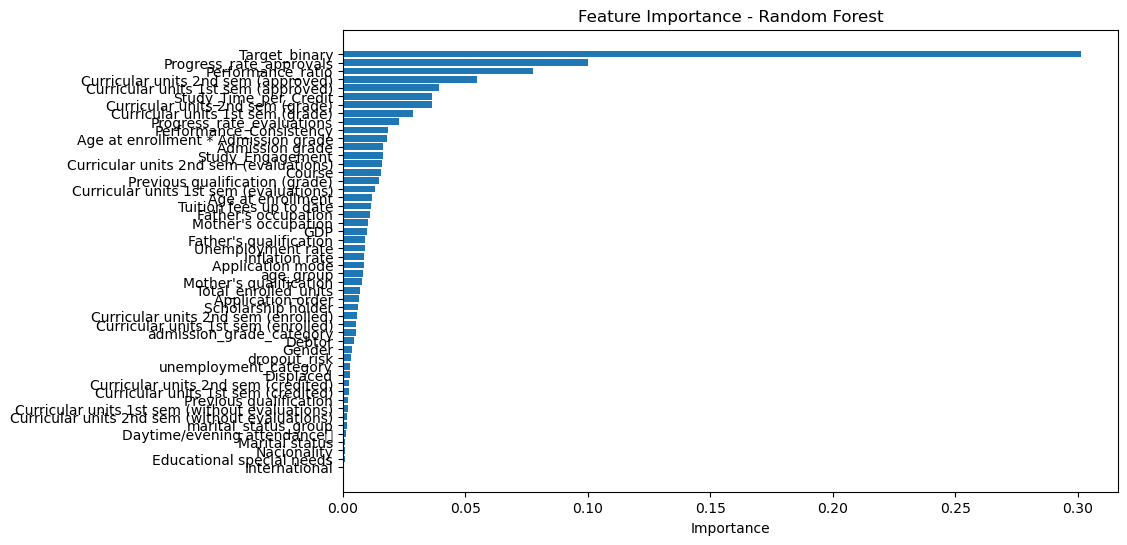

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Specify the target variable
target_variable = 'Target'  # Update this to match your target column

# Encode categorical variables if necessary
categorical_features = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

# Encode all categorical features
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

# Split the dataset into features (X) and target (y)
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print("Feature Importance from Random Forest:\n", feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()


# Feature Importance - Random Forest

The chart illustrates the feature importance derived from a Random Forest model. 

## Key Insights:

- **Most Important Feature**: 
  - **Target binary**: This feature is crucial for model predictions.
  
- **Other Significant Features**:
  - **Performance**: Plays a vital role in influencing the target outcome.
  - **Curricular units 2nd sem (approved)**: Important for predictions.
  - **Curricular units 1st sem (grade)**: Also a key predictor.
  
- **Moderately Important Features**:
  - **Study Time per Credit**
  - **Curricular units 1st sem (evaluations)**
  - **Age at enrollment**

## Conclusion:
The model relies heavily on a few key features while many others contribute less significantly, highlighting the importance of careful feature selection in modeling efforts.


### Performing stability selection to identify robust feature subsets

In [62]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample

# Specify the target variable
target_variable = 'Target'  # Update this to match your target column

# Encode categorical variables if necessary
categorical_features = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

# Encode all categorical features
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

# Split the dataset into features (X) and target (y)
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Number of subsamples and iterations for stability selection
n_iterations = 100
selected_features_counts = np.zeros(X.shape[1])

# Stability selection with subsampling and Lasso
for i in range(n_iterations):
    # Create a random subsample (with replacement)
    X_resampled, y_resampled = resample(X_scaled, y, n_samples=int(0.75*X_scaled.shape[0]), random_state=i)
    
    # Apply Lasso with a predefined alpha
    lasso = Lasso(alpha=0.01)
    lasso.fit(X_resampled, y_resampled)
    
    # Count the number of times each feature is selected
    selected_features_counts += (lasso.coef_ != 0)

# Normalize the counts by the number of iterations to get selection frequencies
selection_frequencies = selected_features_counts / n_iterations

# Set a threshold for feature stability (e.g., selected in more than 50% of iterations)
threshold = 0.5
stable_features = np.where(selection_frequencies > threshold)[0]

# Get names of stable features
stable_feature_names = X.columns[stable_features]

# Display the robust features
print("Selected robust features:\n", stable_feature_names)


Selected robust features:
 Index(['Application mode', 'Course', 'Previous qualification (grade)',
       'Mother's qualification', 'Admission grade', 'Debtor', 'Gender',
       'Scholarship holder', 'Study_Time_per_Credit',
       'Performance_Consistency', 'Target_binary', 'Progress_rate_evaluations',
       'Progress_rate_approvals'],
      dtype='object')


The analysis uses Lasso regression for feature selection through stability selection, iterating 100 times with random subsamples of the dataset. Categorical variables are encoded, and features are standardized before applying Lasso with a predefined alpha value of 0.01. 

After counting how often each feature is selected across iterations, features that are chosen in more than 50% of the iterations are deemed stable. The final output displays the names of these robust features, indicating their significance in predicting the target variable. This method ensures that only the most reliable features are retained for further modeling, enhancing the robustness of the analysis.

### Applying Principal Component Analysis (PCA)

Explained variance ratio of each principal component:
[0.18546232 0.12266644 0.05953489 0.0511299  0.04487905 0.041958
 0.03576015 0.03508116 0.03427226 0.03168477 0.02698164 0.02382954
 0.02194613 0.0203994  0.01924457 0.01873628 0.01774043 0.01693877
 0.01653684 0.01532731 0.01507626 0.0135512  0.0130306  0.01227501
 0.01119355 0.01056564 0.00957873 0.00919547 0.00862553 0.00802085]


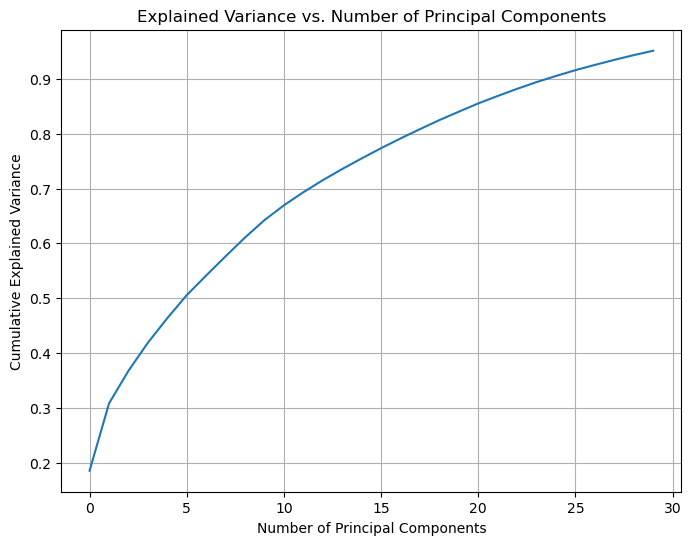

PCA results saved to pca_results.csv


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,Target
0,-7.858748,-2.987844,0.380062,-1.840014,1.562700,0.421712,-0.800064,-0.447762,0.896838,-2.190990,...,-0.387389,0.472098,1.170838,0.253774,-0.989080,0.152785,-0.973271,0.383363,0.436692,0
1,0.742007,-1.740797,-0.037401,-0.761769,-1.907382,1.925675,-0.495042,0.206964,-0.940960,-0.772596,...,0.150608,-0.321095,-1.354749,2.000878,0.528517,-0.887363,0.011181,-1.100871,-0.152658,2
2,-6.696592,-0.196136,3.428941,-0.699351,2.116956,-0.589941,-1.437549,-0.728811,-0.596792,1.296725,...,-0.457642,-0.038764,0.542075,1.593809,0.161503,0.057493,0.147040,-0.670403,0.054591,0
3,1.468505,-1.143208,-0.572278,0.687895,0.649854,-0.980121,-1.155005,0.352085,0.425989,0.664848,...,0.574711,-0.905864,0.359001,-0.518745,0.152550,-0.364231,-0.125865,-0.328459,-0.597043,2
4,0.517763,2.800090,-4.950377,-1.411681,0.350636,-1.055421,-0.345189,-0.908063,0.726904,0.409573,...,0.263353,1.365337,-1.081578,0.153399,-0.740177,0.466761,0.782839,-0.263253,0.880412,2


In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Specify the target variable
target_variable = 'Target'  # Update to match your target column

# Encode categorical variables
categorical_features = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

# Encode all categorical features
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

# Drop the target variable to prepare the dataset for PCA
X = df.drop(columns=[target_variable])

# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Preserve 95% of variance (you can also specify the number of components)
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio of each principal component
print("Explained variance ratio of each principal component:")
print(pca.explained_variance_ratio_)

# Plot cumulative explained variance to decide the number of components
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid()
plt.show()

# Add PCA components to the dataframe
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Optionally, concatenate the target variable back to the PCA-transformed data
df_pca[target_variable] = df[target_variable]

# Save PCA results (optional)
pca_results_path = 'pca_results.csv'
df_pca.to_csv(pca_results_path, index=False)
print(f"PCA results saved to {pca_results_path}")

# Display the first few rows of the PCA-transformed data
df_pca.head()

### Interpretation of Cumulative Explained Variance Chart

The chart illustrates the cumulative explained variance versus the number of principal components in a Principal Component Analysis (PCA):

- As the number of components increases, the cumulative explained variance approaches 1, indicating that more components capture a larger portion of the data's variability.
- Initially, the explained variance rises steeply, suggesting that the first few components are highly informative.
- The rate of increase diminishes with additional components, indicating that they contribute less to the overall variance.
- This analysis aids in identifying the optimal number of components to retain for effective dimensionality reduction while preserving significant informat##  on.

# Summary of PCA

Tms Principal Component Analysis (PC performedA) othe a datas helpet to reducthets dimensionali of the datasetty while preserving 95% of the variance. It begins by encoding categorical variables and standardizing the data. After applying PCA, it prints the explained variance ratio of each principal component and plots the cumulative explained variance. The PCA-transformed data is then stored in a new DataFrame, optionally including the target variable. Finally, it displays the first few rows of the PCA results.


### Implementing t-SNE for visualization of high-dimensional data

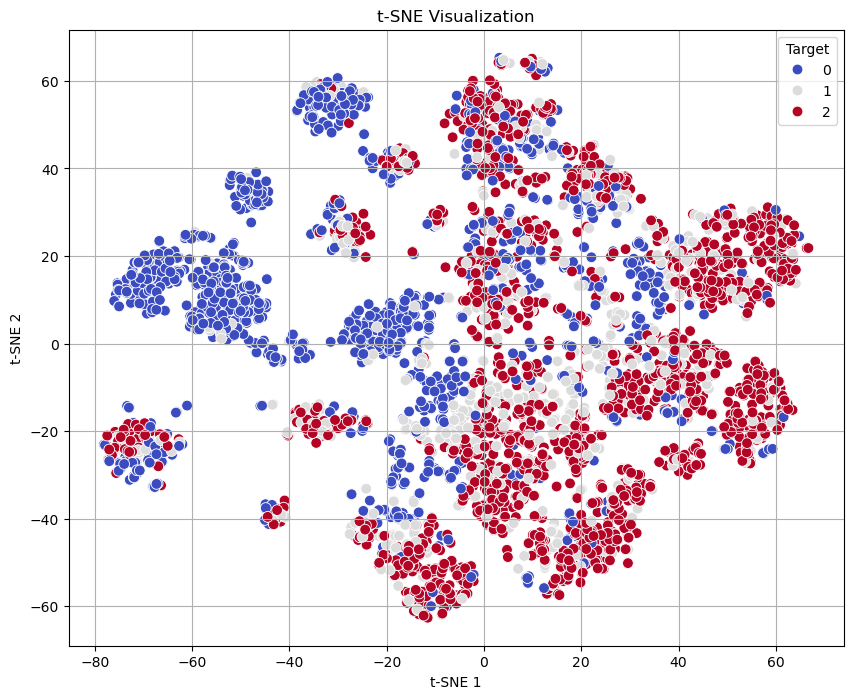

In [68]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import TSNE

# Specify the target variable
target_variable = 'Target'  # Update this to match your target column

# Encode categorical variables
categorical_features = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

# Encode all categorical features
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

# Drop the target variable and prepare the data for t-SNE
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE (set n_components=2 for 2D, 3 for 3D visualization)
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Convert the t-SNE results into a DataFrame for easy plotting
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne[target_variable] = y

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='TSNE1', y='TSNE2', hue=target_variable, palette='coolwarm', data=df_tsne, s=60
)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Target')
plt.grid(True)
plt.show()


# Interpretation of t-SNE Visualization

The t-SNE visualization displays a two-dimensional representation of a dataset, where the points are color-coded based on the target variable, which has three classes (0, 1, and 2). The clusters suggest that classes 0 and 1 are more distinct and separated from each other, while class 2 overlaps with both. This indicates that the model may differentiate between classes 0 and 1 effectively, but class 2 might be more challenging to distinguish. Overall, the visualization provides insights into the relationships and separability of the different classes in the dataset.
